In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))



In [4]:
df = pd.read_csv('china_data.csv')

In [6]:
df = df.set_index('date')

In [10]:
df.iloc[-1,:].sort_values()

Inner Mongolia    0.000463
Tibet             0.000677
Xinjiang          0.000984
Liaoning          0.001699
Jilin             0.002255
Tianjin           0.002446
Shandong          0.002498
Fujian            0.002514
Guangxi           0.002604
Yunnan            0.002628
Jiangsu           0.002786
Shanxi            0.003151
Shaanxi           0.003233
Hebei             0.003388
Beijing           0.003760
Sichuan           0.003835
Guizhou           0.003850
Qinghai           0.004537
Shanghai          0.004927
Heilongjiang      0.005195
Guangdong         0.005387
Gansu             0.007034
Zhejiang          0.009022
Anhui             0.009331
Ningxia           0.009446
Henan             0.010592
Chongqing         0.011049
Hainan            0.012210
Jiangxi           0.012509
Hunan             0.013672
Hubei             0.199713
Name: 2020-02-17, dtype: float64

In [63]:
df.loc[:, ['Shanxi', 'Jiangxi']].iloc[10:, :]

,Shanxi,Jiangxi
date,,
2020-02-01,0.000059,0.000409
2020-02-02,0.000178,0.000546
2020-02-03,0.000119,0.000819
2020-02-04,0.000238,0.000910
2020-02-05,0.000297,0.001228
2020-02-06,0.000714,0.001683
2020-02-07,0.000892,0.002047
2020-02-08,0.001249,0.002502
2020-02-09,0.001486,0.003320


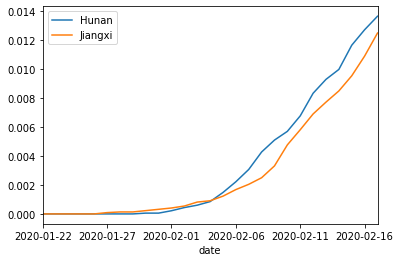

In [70]:
df.loc[:, ['Hunan', 'Jiangxi']].plot()

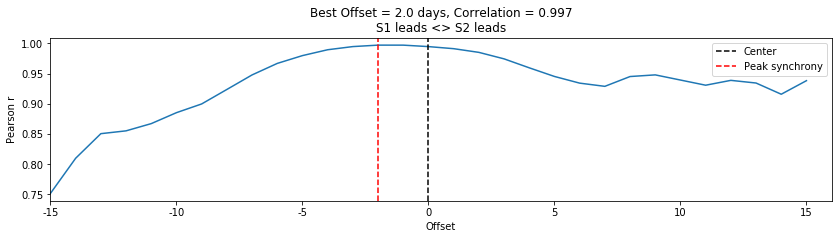

In [82]:
d1 = df['Hunan']
d2 = df['Jiangxi']

rs = [crosscorr(d1,d2, lag) for lag in range(-15,16)]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.floor(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Best Offset = {offset} days, Correlation = {np.max(rs).round(3)}\nS1 leads <> S2 leads',
       #ylim=[.1,.31],
       xlim=[0,31],
       xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels([-15, -10, -5, 0, 5, 10, 15]);
plt.legend()

In [75]:
np.floor(len(rs)/2)-np.argmax(rs)

2.0

In [79]:
np.max(rs)

0.9972399805170221

In [83]:
df.columns

Index(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang'],
      dtype='object')

In [90]:
cols = df.columns[~(df.columns == 'Jiangxi')]

/Users/roger/Projects/coronavirus/Sales_Forecast/env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


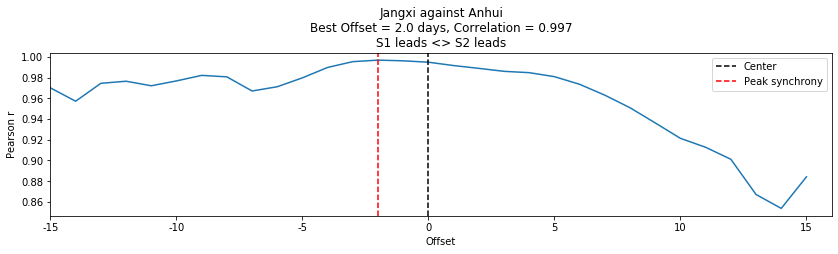

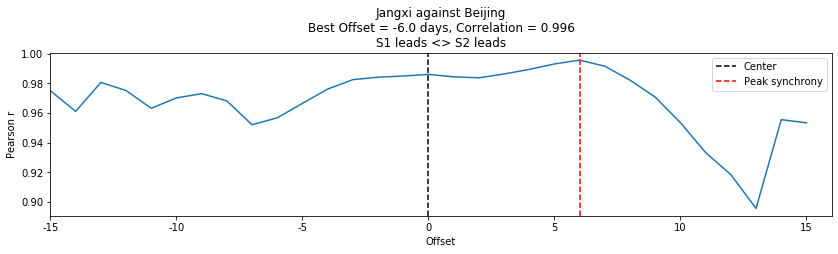

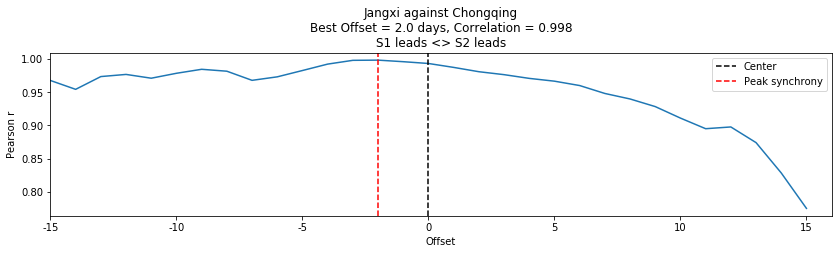

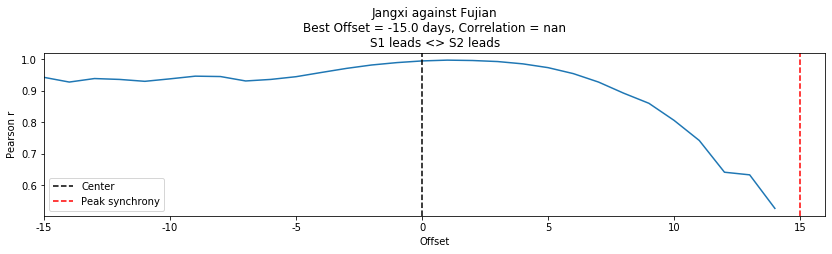

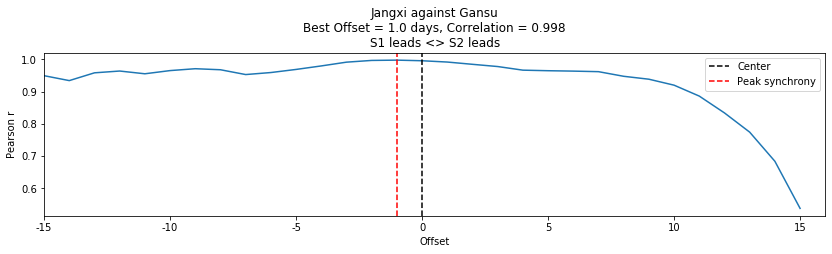

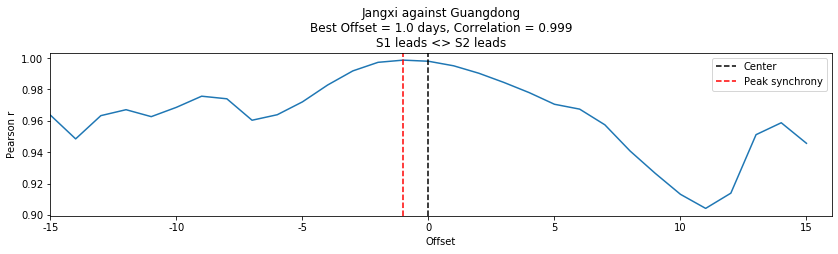

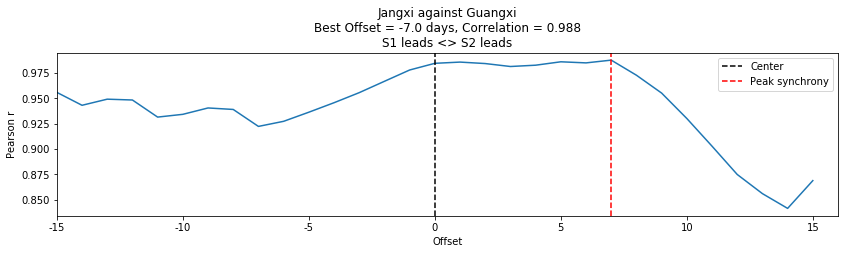

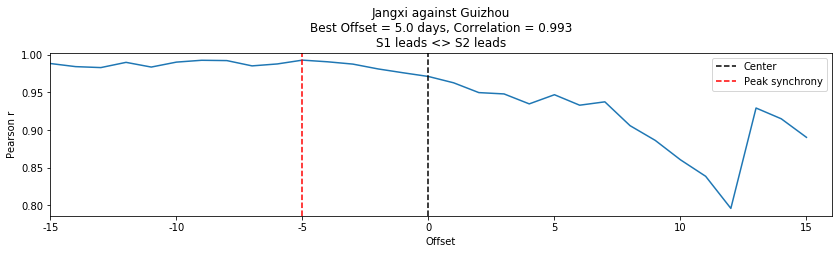

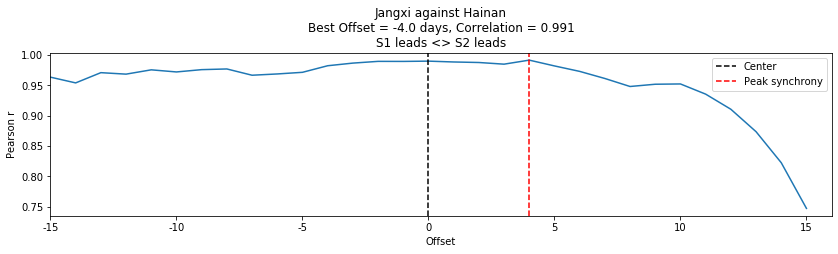

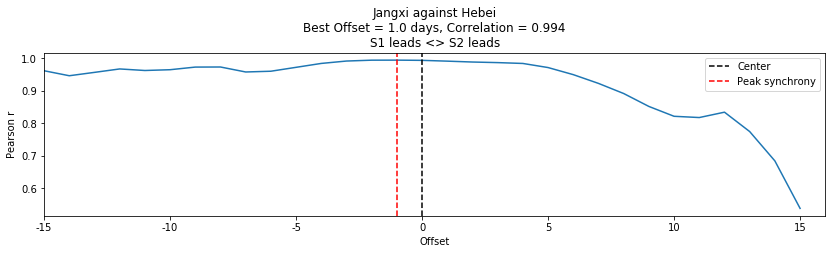

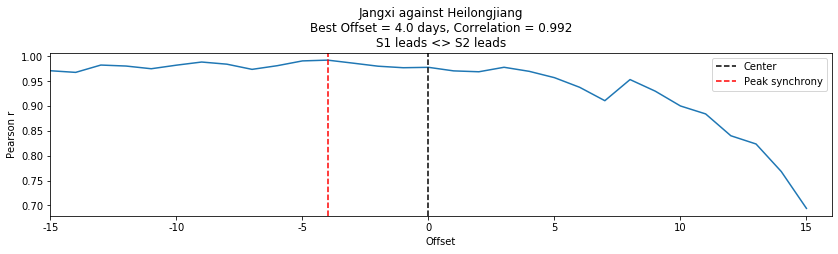

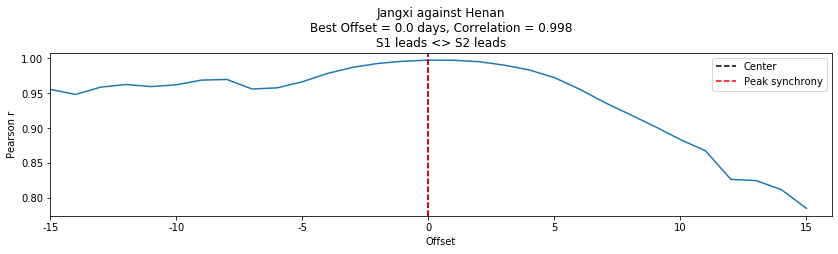

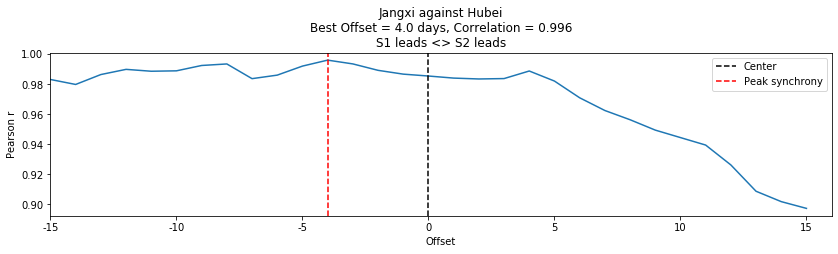

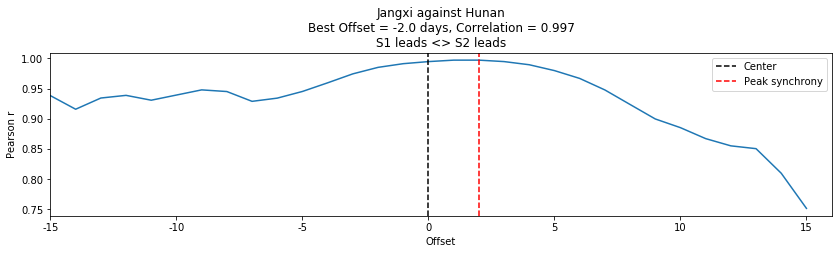

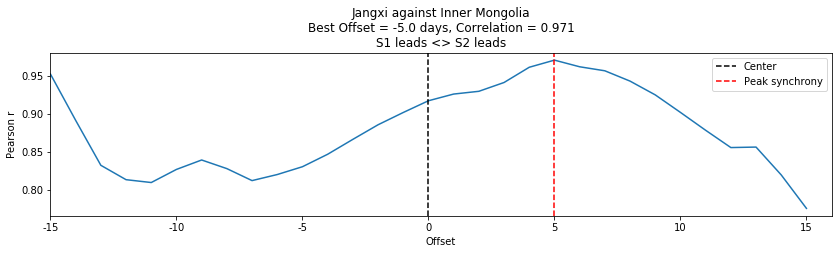

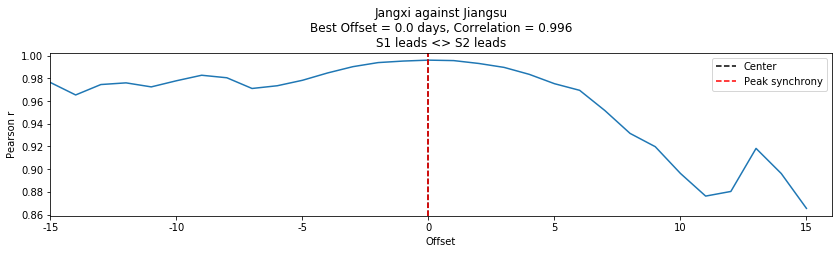

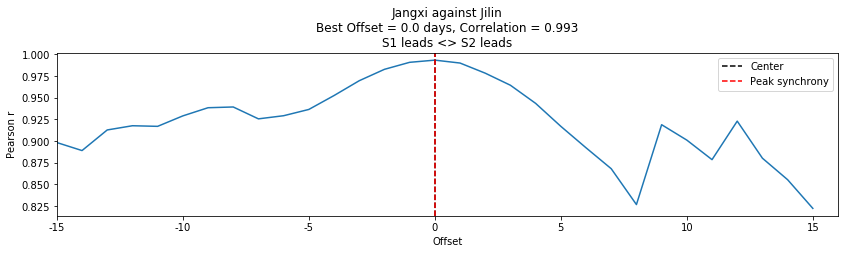

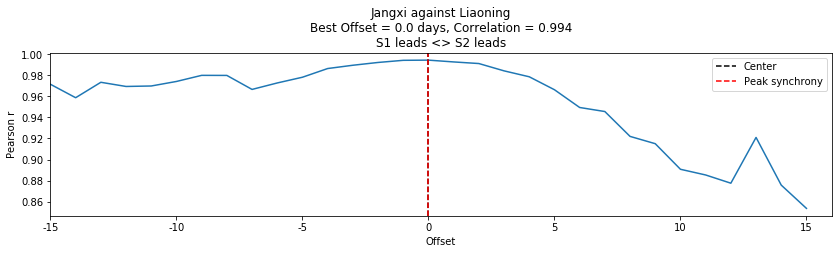

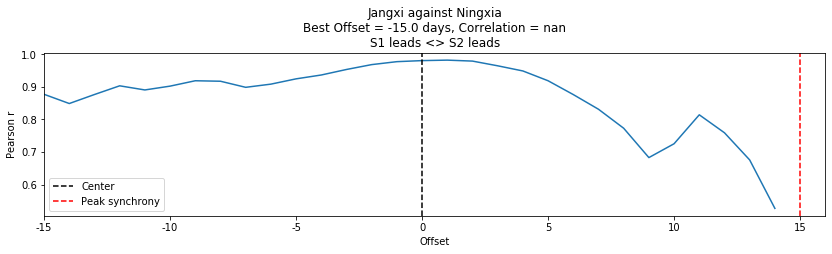

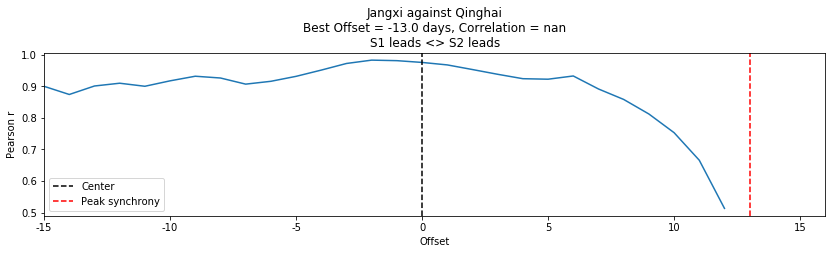

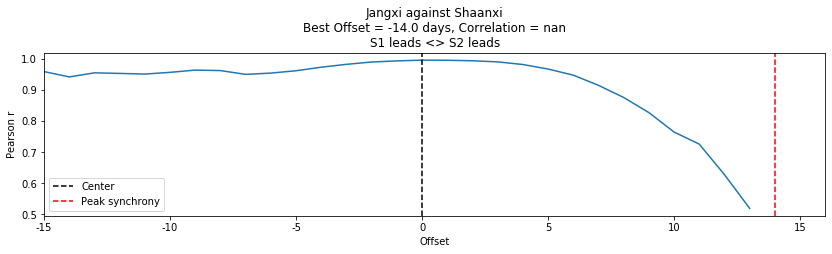

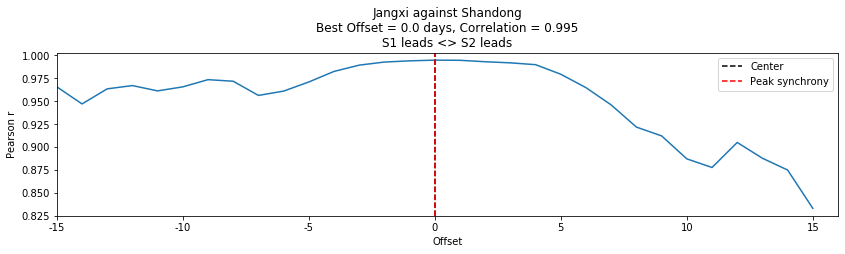

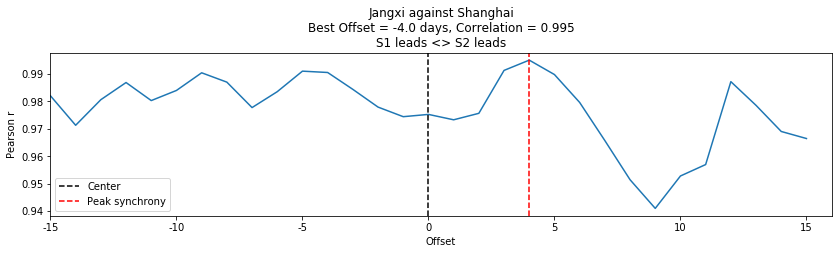

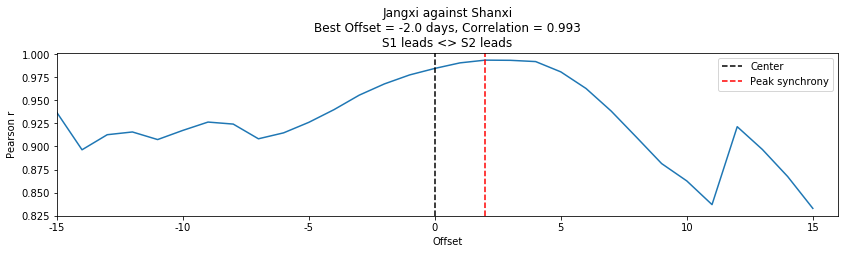

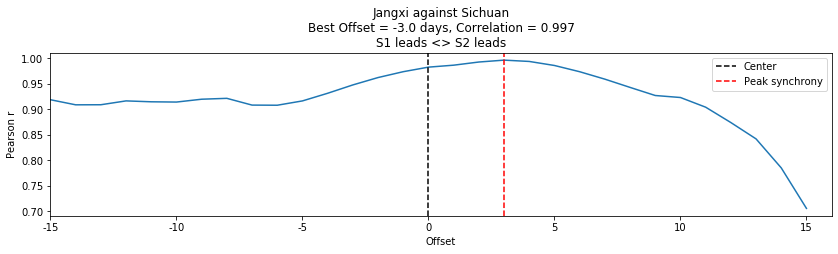

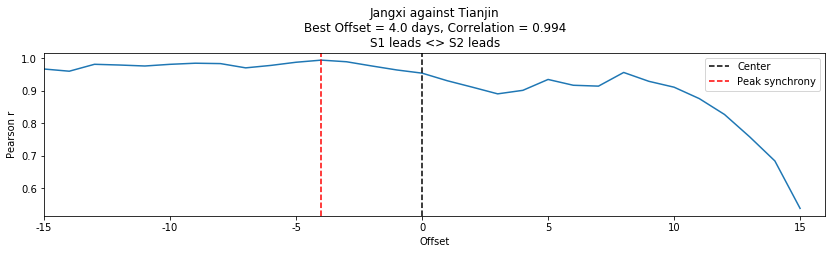

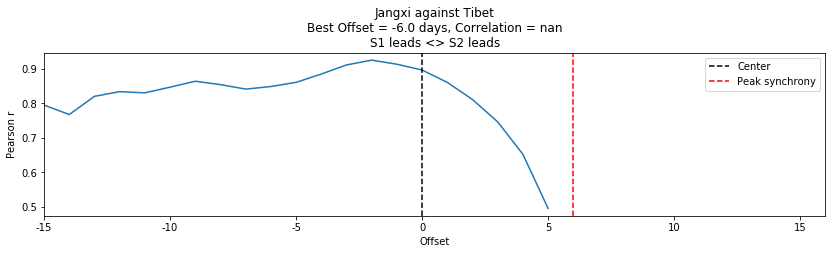

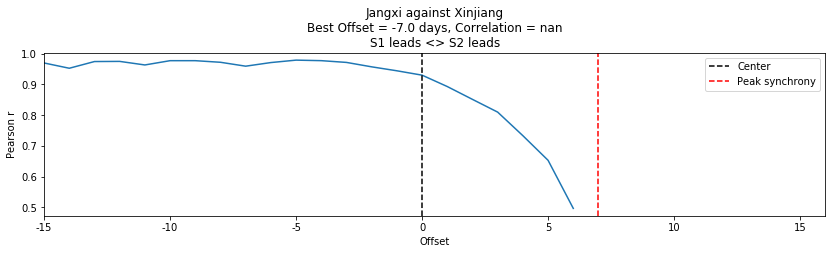

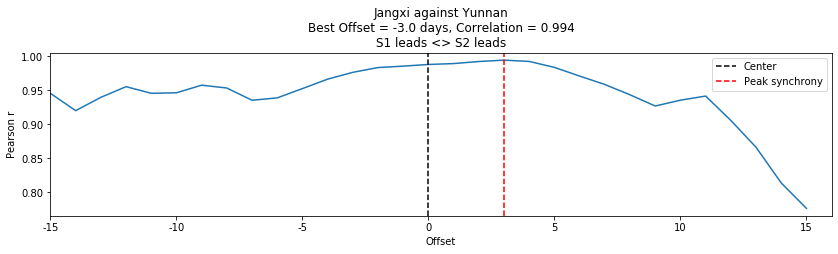

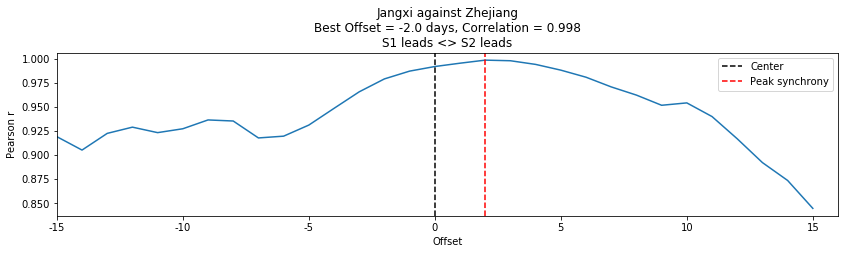

In [93]:
for col in cols:
   
    d1 = df['Jiangxi']
    d2 = df[col]

    rs = [crosscorr(d1,d2, lag) for lag in range(-15,16)]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(14,3))
    
    ax.plot(rs)
    ax.axvline(np.floor(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Jangxi against {col}\nBest Offset = {offset} days, Correlation = {np.max(rs).round(3)}\nS1 leads <> S2 leads',
           #ylim=[.1,.31],
           xlim=[0,31],
           xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
    ax.set_xticklabels([-15, -10, -5, 0, 5, 10, 15]);
    plt.legend()
        
        

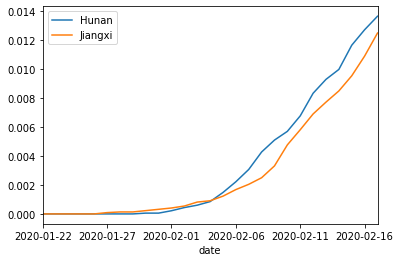

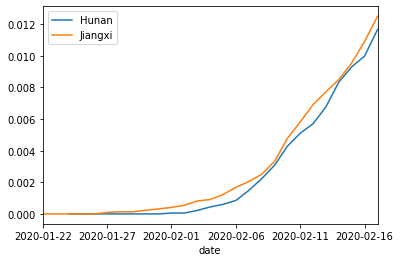

In [74]:
df.loc[:, ['Hunan', 'Jiangxi']].plot()
pd.concat([df['Hunan'].shift(2), df['Jiangxi']], axis=1).plot()

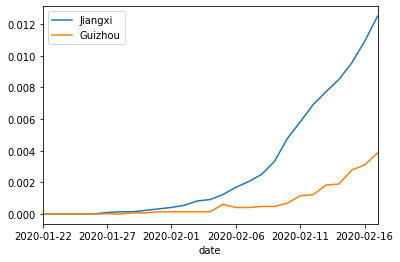

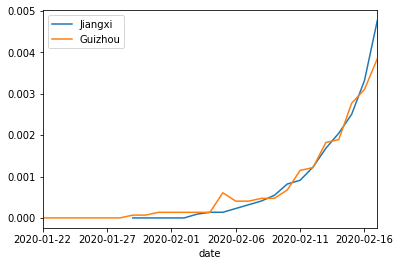

In [102]:
df.loc[:, ['Jiangxi', 'Guizhou']].plot()
pd.concat([df['Jiangxi'].shift(7), df['Guizhou']], axis=1).plot()